In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
np.random.seed(245)

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from tensorflow.keras.utils import to_categorical


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekday_batch/AI and Deep Learning using TensorFLow/Module 4/Dataset for In-Class Demo/train.csv")
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekday_batch/AI and Deep Learning using TensorFLow/Module 4/Dataset for In-Class Demo/test.csv")

Mounted at /content/drive


In [ ]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

X_test = df_test.iloc[:, 0:784]

print(X_test.shape)

(28000, 784)


In [ ]:
df_label.shape

(42000,)

In [ ]:
df_features.shape

(42000, 784)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label,
                                                test_size = 0.2,
                                                random_state = 1212)

print(X_train.shape)
print(X_cv.shape)
print(y_train.shape)
print(y_cv.shape)


(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [ ]:
X_train = X_train.to_numpy().reshape(33600, 784)
X_cv = X_cv.to_numpy().reshape(8400, 784)

X_test = X_test.to_numpy().reshape(28000, 784)

In [ ]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)


(33600, 784)
(8400, 784)
(28000, 784)


In [ ]:
print((min(X_cv[1]), max(X_cv[1])))

(0, 255)


In [ ]:
# Feature Normalization
X_train = X_train.astype('float32');
X_cv= X_cv.astype('float32');
X_test = X_test.astype('float32')
X_train /= 255;
X_cv /= 255;
X_test /= 255

# Convert labels to One Hot Encoded
num_digits = 10
y_train = to_categorical(y_train, num_digits)
y_cv = to_categorical(y_cv, num_digits)

In [ ]:
# Printing 2 examples of labels after conversion
print(y_train[0]) # 2
print(y_train[3]) # 7

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 512
n_hidden_2 = 256
n_hidden_3 = 128
n_hidden_4 = 64
num_digits = 10

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
xx = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
xxx = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(xx)
xxxx = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(xxx)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(xxxx)
# Inp -> X_layer1 -> X -> X_layer2 -> X_layer_3 -> X_layer_4 -> Output

In [ ]:
# Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer
model = Model(Inp, output)
model.summary() # We have 297,910 parameters to estimate

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 512)               401920    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 256)               131328    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 128)               32896     
                                                                 
 Hidden_Layer_4 (Dense)      (None, 64)                8256      
                                                                 
 Output_Layer (Dense)        (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19

In [ ]:
# Insert Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = tf.keras.optimizers.SGD(lr=learning_rate)
# adam = tf.keras.optimizers.ADAM(lr=learning_rate)


In [ ]:
# We rely on the plain vanilla Stochastic Gradient Descent as our optimizing methodology
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 1,
                     validation_data=(X_cv, y_cv))



Epoch 1/20
336/336 [==============================] - 4s 4ms/step - loss: 1.3879 - accuracy: 0.6571 - val_loss: 0.6187 - val_accuracy: 0.8465
Epoch 2/20
336/336 [==============================] - 1s 4ms/step - loss: 0.4653 - accuracy: 0.8774 - val_loss: 0.3758 - val_accuracy: 0.8943
Epoch 3/20
336/336 [==============================] - 1s 4ms/step - loss: 0.3407 - accuracy: 0.9041 - val_loss: 0.3075 - val_accuracy: 0.9120
Epoch 4/20
336/336 [==============================] - 1s 4ms/step - loss: 0.2917 - accuracy: 0.9163 - val_loss: 0.2790 - val_accuracy: 0.9193
Epoch 5/20
336/336 [==============================] - 1s 4ms/step - loss: 0.2604 - accuracy: 0.9244 - val_loss: 0.2553 - val_accuracy: 0.9243
Epoch 6/20
336/336 [==============================] - 1s 4ms/step - loss: 0.2373 - accuracy: 0.9296 - val_loss: 0.2351 - val_accuracy: 0.9324
Epoch 7/20
336/336 [==============================] - 2s 5ms/step - loss: 0.2167 - accuracy: 0.9366 - val_loss: 0.2258 - val_accuracy: 0.9337
Epoch 

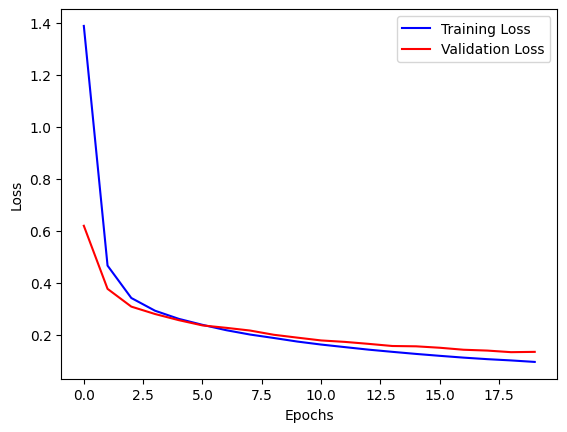

In [ ]:

import matplotlib.pyplot as plt

# Plot the training and validation loss for each epoch
plt.plot(history1.history['loss'], color='b', label='Training Loss')
plt.plot(history1.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [ ]:
score = model.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13630712032318115
Test accuracy: 0.9598809480667114


In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

# We rely on ADAM as our optimizing methodology
model2 = Model(Inp, output)

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 0,
                      validation_data=(X_cv, y_cv))

score = model.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13630712032318115
Test accuracy: 0.9598809480667114


In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

learning_rate = 0.01
adam = tf.keras.optimizers.Adam(lr=learning_rate)
model2a = Model(Inp, output)

model2a.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
history2a = model2a.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                        verbose = 1,
                        validation_data=(X_cv, y_cv))

score = model.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
336/336 [==============================] - 3s 4ms/step - loss: 0.3367 - accuracy: 0.8977 - val_loss: 0.1617 - val_accuracy: 0.9513
Epoch 2/20
336/336 [==============================] - 2s 5ms/step - loss: 0.1249 - accuracy: 0.9622 - val_loss: 0.1376 - val_accuracy: 0.9583
Epoch 3/20
336/336 [==============================] - 2s 7ms/step - loss: 0.0809 - accuracy: 0.9754 - val_loss: 0.1120 - val_accuracy: 0.9645
Epoch 4/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0633 - accuracy: 0.9794 - val_loss: 0.1125 - val_accuracy: 0.9661
Epoch 5/20
336/336 [==============================] - 1s 4ms/step - loss: 0.0436 - accuracy: 0.9856 - val_loss: 0.1186 - val_accuracy: 0.9682
Epoch 6/20
336/336 [==============================] - 1s 4ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0929 - val_accuracy: 0.9745
Epoch 7/20
336/336 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9890 - val_loss: 0.1137 - val_accuracy: 0.9702
Epoch 

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

learning_rate = 0.5
adam = tf.keras.optimizers.Adam(lr=learning_rate)
model2b = Model(Inp, output)

model2b.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
history2b = model2b.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                            validation_data=(X_cv, y_cv))

score = model.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
336/336 [==============================] - 3s 5ms/step - loss: 0.3358 - accuracy: 0.8948 - val_loss: 0.1695 - val_accuracy: 0.9493
Epoch 2/20
336/336 [==============================] - 3s 10ms/step - loss: 0.1209 - accuracy: 0.9625 - val_loss: 0.1136 - val_accuracy: 0.9651
Epoch 3/20
336/336 [==============================] - 1s 4ms/step - loss: 0.0808 - accuracy: 0.9744 - val_loss: 0.0973 - val_accuracy: 0.9710
Epoch 4/20
336/336 [==============================] - 1s 4ms/step - loss: 0.0567 - accuracy: 0.9820 - val_loss: 0.1035 - val_accuracy: 0.9702
Epoch 5/20
336/336 [==============================] - 1s 4ms/step - loss: 0.0462 - accuracy: 0.9850 - val_loss: 0.0950 - val_accuracy: 0.9733
Epoch 6/20
336/336 [==============================] - 1s 4ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0992 - val_accuracy: 0.9740
Epoch 7/20
336/336 [==============================] - 1s 4ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.1054 - val_accuracy: 0.9718
Epoch

In [ ]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 100
n_hidden_5 = 200
num_digits = 10

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [ ]:
# Our model would have '7' layers - input layer, 5 hidden layer and 1 output layer
model3 = Model(Inp, output)
model3.summary() # We have 308,010 parameters to estimate

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               10100     
                                                                 
 Hidden_Layer_4 (Dense)      (None, 100)               10100     
                                                                 
 Hidden_Layer_5 (Dense)      (None, 200)               20200     
                                                                 
 Output_Layer (Dense)        (None, 10)                2010

In [ ]:
# We rely on 'Adam' as our optimizing methodology
adam = tf.keras.optimizers.Adam(lr=0.01)

model3.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      validation_data=(X_cv, y_cv),
                      verbose=2)

score = model3.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
336/336 - 4s - loss: 0.3620 - accuracy: 0.8899 - val_loss: 0.1735 - val_accuracy: 0.9442 - 4s/epoch - 12ms/step
Epoch 2/20
336/336 - 1s - loss: 0.1293 - accuracy: 0.9599 - val_loss: 0.1129 - val_accuracy: 0.9664 - 1s/epoch - 4ms/step
Epoch 3/20
336/336 - 1s - loss: 0.0865 - accuracy: 0.9731 - val_loss: 0.1030 - val_accuracy: 0.9690 - 1s/epoch - 4ms/step
Epoch 4/20
336/336 - 1s - loss: 0.0615 - accuracy: 0.9804 - val_loss: 0.0983 - val_accuracy: 0.9705 - 1s/epoch - 4ms/step
Epoch 5/20
336/336 - 1s - loss: 0.0497 - accuracy: 0.9832 - val_loss: 0.1054 - val_accuracy: 0.9685 - 1s/epoch - 4ms/step
Epoch 6/20
336/336 - 1s - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0988 - val_accuracy: 0.9733 - 1s/epoch - 3ms/step
Epoch 7/20
336/336 - 1s - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.1335 - val_accuracy: 0.9650 - 1s/epoch - 4ms/step
Epoch 8/20
336/336 - 1s - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.1280 - val_accuracy: 0.9662 - 1s/epoch - 4ms/step
Epoch 9/20
336/336 - 2s

In [ ]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [ ]:
# Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer
model4 = Model(Inp, output)
model4.summary() # We have 297,910 parameters to estimate

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0   

In [ ]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model4.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = training_epochs,
                    validation_data=(X_cv, y_cv))

Epoch 1/20
336/336 [==============================] - 4s 5ms/step - loss: 0.5735 - accuracy: 0.8174 - val_loss: 0.2114 - val_accuracy: 0.9398
Epoch 2/20
336/336 [==============================] - 2s 4ms/step - loss: 0.2372 - accuracy: 0.9291 - val_loss: 0.1437 - val_accuracy: 0.9575
Epoch 3/20
336/336 [==============================] - 1s 4ms/step - loss: 0.1732 - accuracy: 0.9481 - val_loss: 0.1217 - val_accuracy: 0.9649
Epoch 4/20
336/336 [==============================] - 2s 5ms/step - loss: 0.1465 - accuracy: 0.9570 - val_loss: 0.1091 - val_accuracy: 0.9688
Epoch 5/20
336/336 [==============================] - 2s 6ms/step - loss: 0.1224 - accuracy: 0.9639 - val_loss: 0.1162 - val_accuracy: 0.9674
Epoch 6/20
336/336 [==============================] - 2s 5ms/step - loss: 0.1092 - accuracy: 0.9668 - val_loss: 0.0942 - val_accuracy: 0.9746
Epoch 7/20
336/336 [==============================] - 1s 4ms/step - loss: 0.0989 - accuracy: 0.9710 - val_loss: 0.0989 - val_accuracy: 0.9736
Epoch 

KeyboardInterrupt: 

In [ ]:
score = model4.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
X_test

In [ ]:
import pandas as pd
test_pred = pd.DataFrame(model4.predict(X_test, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

In [ ]:
test_pred.to_csv('mnist_submission.csv', index = False)